# Long-Term Hedging of Energy-Related Commodities Using New Feature Discovery and Machine Learning Techniques

Predicting the performance of energy commodities has long been a global priority for researchers and investors in the Energy sector.  Large projects (often exceeding 1bn USD) are financed with locked in capital from the start, and typically take decades to return. Despite being one of the most important aspects of investment decision making, the prediction methodologies used widely today are not sophisticated enough to provide any hard quantifiable insights. The new approach was proposed to provide data analytics backed hedging for the performance of energy related commodities using novel feature discovery methods and machine learning tools. In the presented research, a machine learning model was trained to predict the average monthly price of electricity in the next 5 years with focus on the California State. Data points from 2001 to 2017 are collected and 78 data points are considered for various analyses to find the highly-correlated features which could affect the electricity price. An economic case study is undertaken to understand the correlation of the features, and to avoid multicollinearity. In the next step, the features are fed into an S-ARIMA time series prediction algorithm, as well as several feature-based machine learning algorithms. The findings demonstrated promising results for 3 years future price prediction. The analyzes results suggest that 5 year results are attainable.

# Electricity price prediction

In [2]:
# # Load required modules
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt

# # visualization
# import seaborn as sns
# import matplotlib.pyplot as plt
# %matplotlib inline

# # machine learning
# from sklearn.linear_model import LogisticRegression
# from sklearn.svm import SVC, LinearSVC
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.naive_bayes import GaussianNB # Gaussian Naive Bays
# from sklearn.linear_model import Perceptron
# from sklearn.linear_model import SGDClassifier #stochastic gradient descent
# from sklearn.tree import DecisionTreeClassifier

# # Garbage Collector
# import gc

In [3]:
#Importing necessary modules 
import numpy as np
import pandas as pd  
import matplotlib.pyplot as plt 
import seaborn as sns


%matplotlib inline

#machine learning
from sklearn.linear_model import LogisticRegression




In [4]:
# data = pd.read_csv('final.csv', parse_dates=[0], index_col=0, dayfirst=True)  # all data
# data.head()

In [12]:
data = pd.read_csv('final.csv',parse_dates = [0], index_col=0, dayfirst=True)
data.head()

,GenCalifornia...all.fuels..utility.scale..thousand.megawatthours,GenCalifornia...coal.thousand.megawatthours,GenCalifornia...petroleum.liquids.thousand.megawatthours,GenCalifornia...petroleum.coke.thousand.megawatthours,GenCalifornia...natural.gas.thousand.megawatthours,GenCalifornia...other.gases.thousand.megawatthours,GenCalifornia...nuclear.thousand.megawatthours,GenCalifornia...conventional.hydroelectric.thousand.megawatthours,GenCalifornia...other.renewables.thousand.megawatthours,GenCalifornia...hydro.electric.pumped.storage.thousand.megawatthours,...,Natural.Gas.Consumed.by.the.Transportation.Sector..Pipelines.and.Distribution..Billion.Cubic.Feet.,Natural.Gas.Consumed.by.the.Transportation.Sector..Vehicle.Fuel..Billion.Cubic.Feet.,Natural.Gas.Consumed.by.the.Transportation.Sector..Total..Billion.Cubic.Feet.,Natural.Gas.Consumed.by.the.Electric.Power.Sector..Billion.Cubic.Feet.,Natural.Gas.Consumption..Total..Billion.Cubic.Feet.,Average.retail.price.of.electricity.monthly.California...all.sectors.cents.per.kilowatthour,Consumption.for.electricity.generation.for.all.sectors.monthly.California...coal.thousand.tons,Consumption.for.electricity.generation.for.natural.gas.monthly.California...all.sectors.thousand.Mcf,Retail.sales.of.electricity.monthly.California...all.sectors.million.kilowatthours,Total.consumption.for.all.sectors.monthly.California...coal.thousand.tons
Month,,,,,,,,,,,,,,,,,,,,,
Jul-17,20980.32206,23.12607,3.44655,0.0,9653.23988,111.09914,1648.012,4371.98080,5008.53970,79.494,...,53.572,3.694,57.266,1051.503,2111.264,17.53,5.424,70676.525,24342.39981,48.016
Jun-17,18260.48619,26.82868,3.31392,0.0,7191.91812,118.54188,959.831,4455.83824,5388.18090,38.328,...,47.968,3.560,51.529,834.144,1890.416,17.55,6.162,52936.269,22235.30692,55.518
May-17,16878.55820,14.41477,3.32468,0.0,5243.68841,136.91117,840.135,4972.12223,5532.79051,66.093,...,47.874,3.679,51.553,697.129,1886.702,15.46,3.572,38705.087,19838.08134,39.540
Apr-17,15436.06640,19.33808,3.53045,0.0,4248.56449,129.62659,1412.868,4397.51087,5155.78836,-9.016,...,48.577,3.560,52.137,613.895,1914.399,13.12,4.529,30739.269,17875.54180,43.499
Mar-17,16101.84657,27.06185,6.00000,0.0,4816.73759,118.23473,1569.141,4481.18059,5062.00859,-50.835,...,63.788,3.679,67.466,667.123,2513.842,15.39,6.222,36072.471,19947.97958,55.854


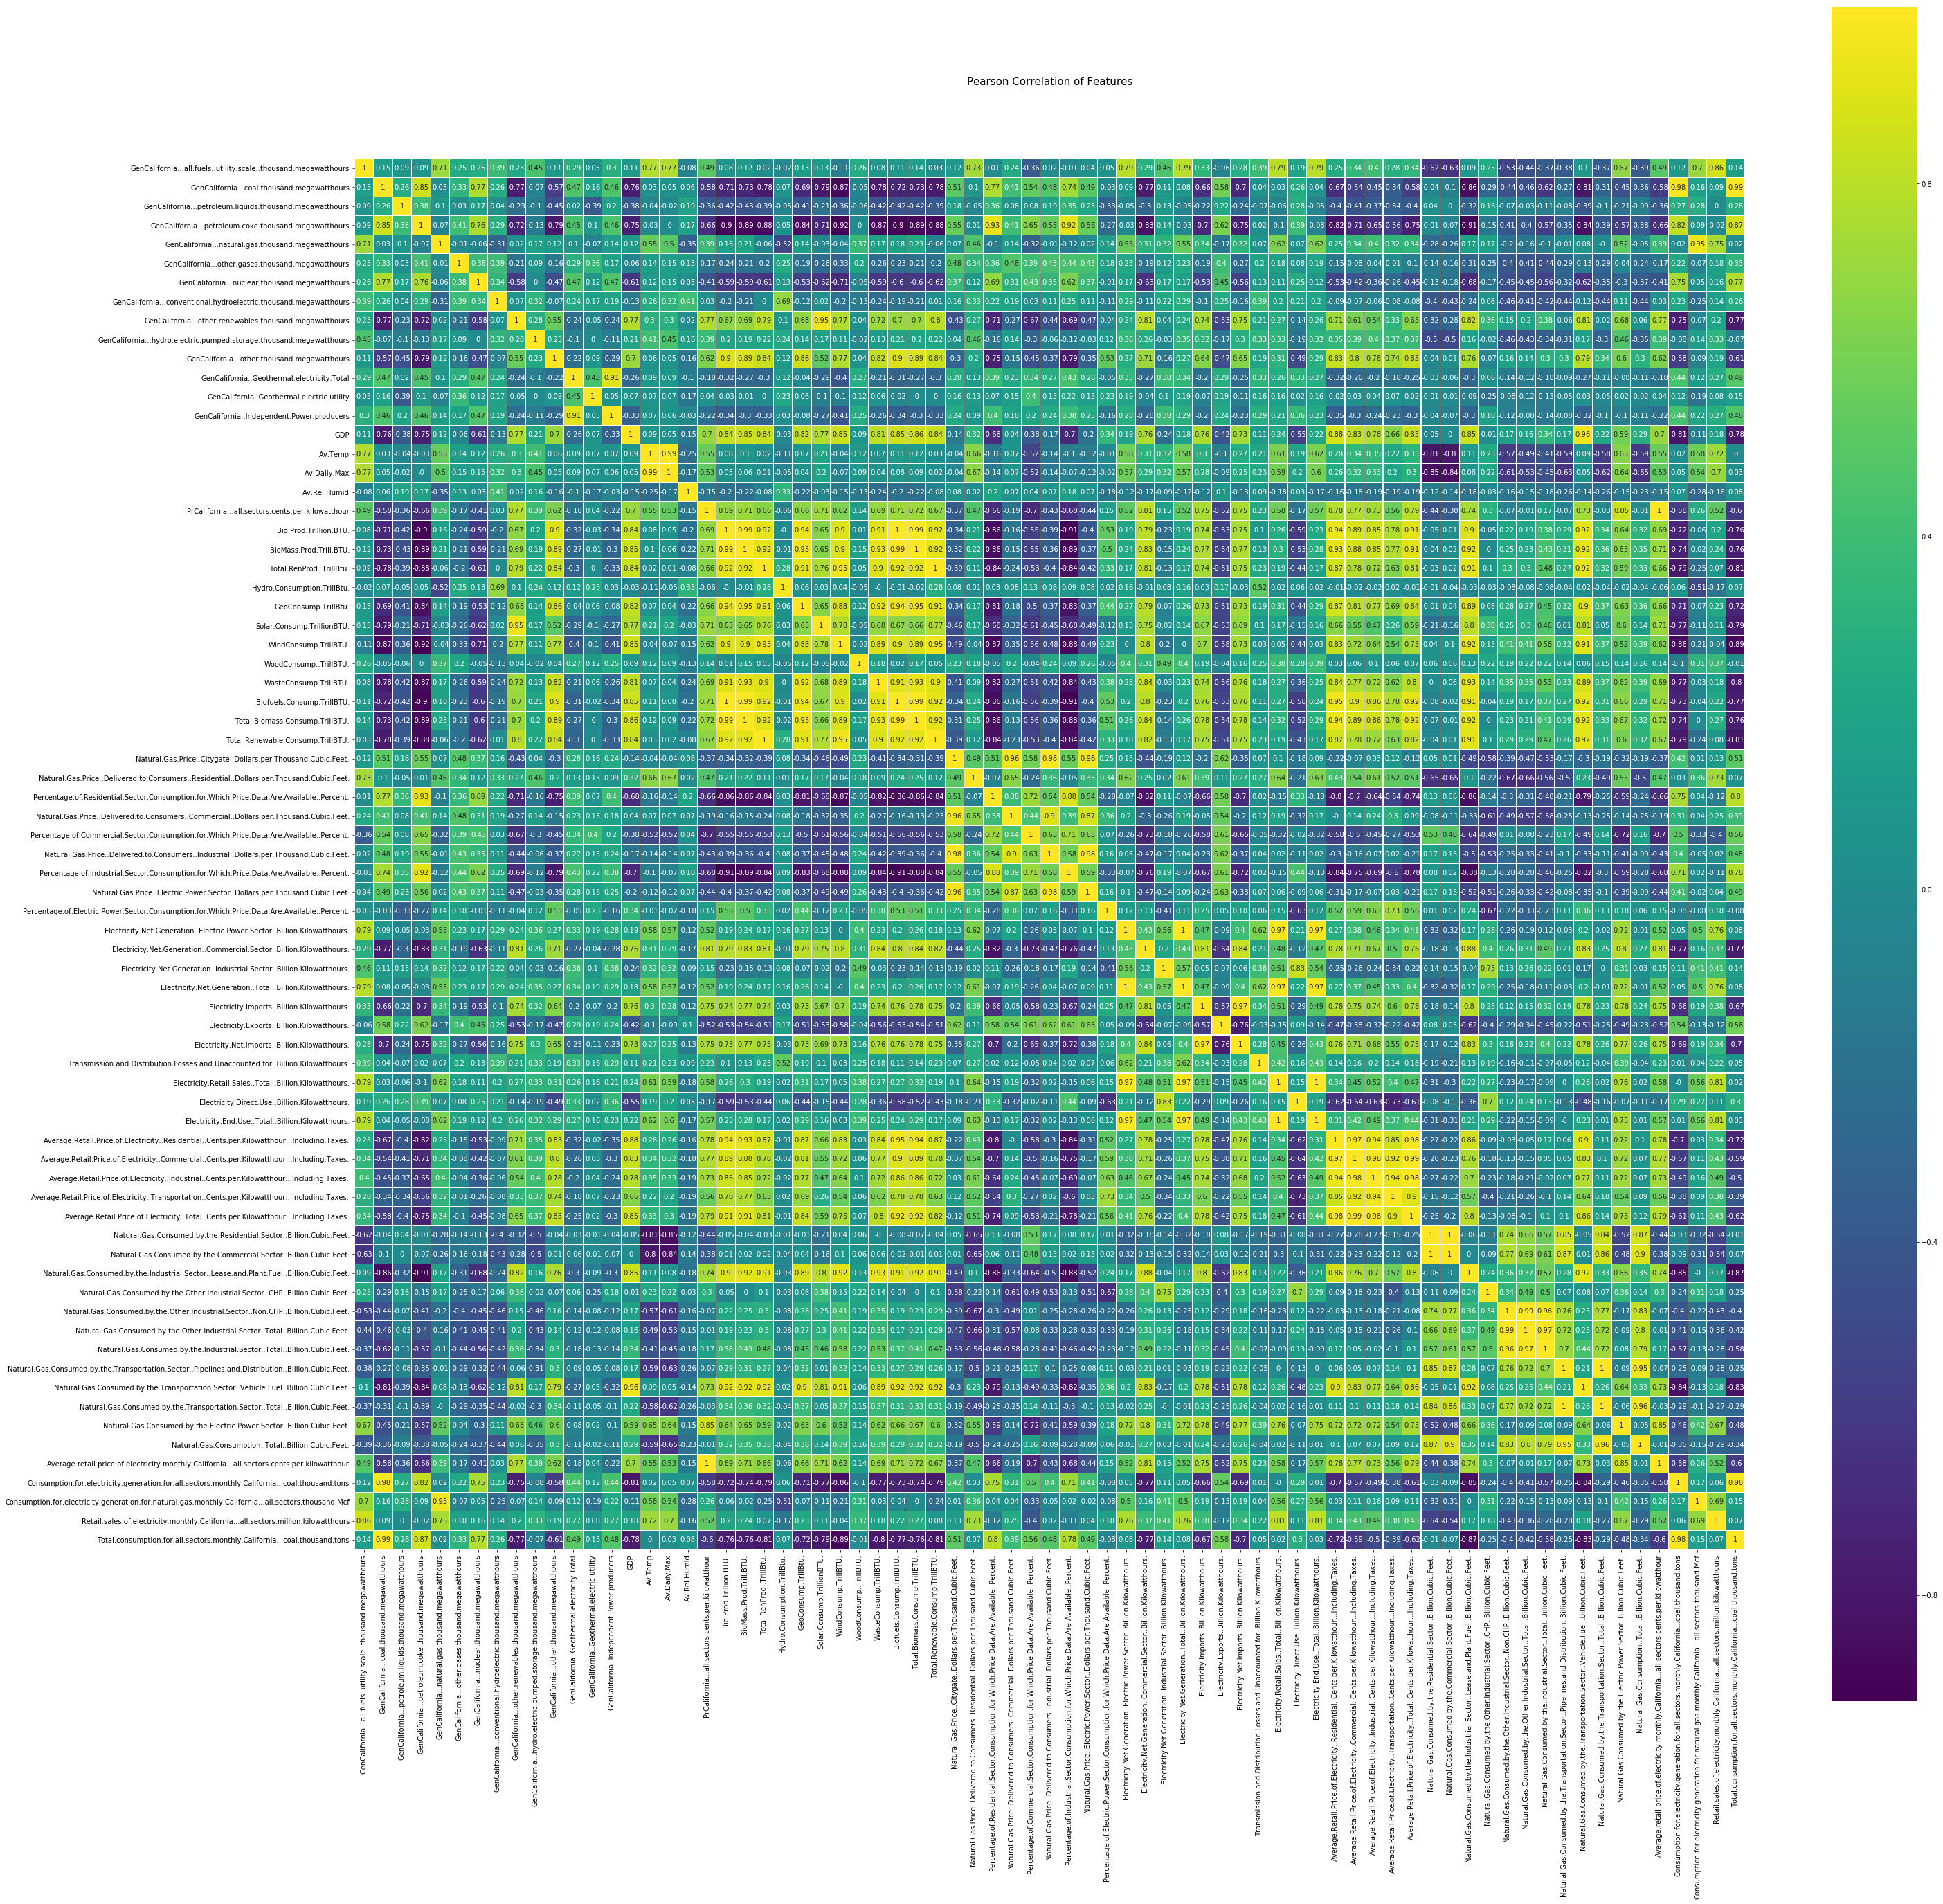

In [17]:
# Check the correlation 
colormap=plt.cm.viridis
plt.figure(figsize=(45,45))
plt.title('Pearson Correlation of Features' , y=1.05, size = 15)

sns.heatmap(data.astype(float).corr().round(2),linewidth=0.1,vmax=1.0,square=True,cmap=colormap,linecolor = 'white', annot=True)


In [ ]:
#data.plot(kind='scatter', x='NP15', y='PG&E')
plt.figure(figsize=(20,20))
ax = data.plot(kind='scatter', x='Average.retail.price.of.electricity.monthly.California...all.sectors.cents.per.kilowatthour', y='GenCalifornia...other.renewables.thousand.megawatthours', color='Orange',  label='Renewables');
data.plot(kind='scatter', x='Average.retail.price.of.electricity.monthly.California...all.sectors.cents.per.kilowatthour', y='GDP', color='DarkBlue',         label='GDP');  
data.plot(kind='scatter', x='Average.retail.price.of.electricity.monthly.California...all.sectors.cents.per.kilowatthour',  y='BioMass.Prod.Trill.BTU.', color='DarkGreen',      label='Biomass'); 
data.plot(kind='scatter', x='Average.retail.price.of.electricity.monthly.California...all.sectors.cents.per.kilowatthour',  y='Electricity.Net.Generation..Commercial.Sector..Billion.Kilowatthours.', color='Red',      label='Generation'); 
data.plot(kind='scatter', x='Average.retail.price.of.electricity.monthly.California...all.sectors.cents.per.kilowatthour',  y='Solar.Consump.TrillionBTU.', color='Orange',      label='Solar'); 
data.plot(kind='scatter', x='Average.retail.price.of.electricity.monthly.California...all.sectors.cents.per.kilowatthour',  y='Natural.Gas.Consumption..Total..Billion.Cubic.Feet.', color='Blue',      label='Natural  Gas Consumption');
data.plot(kind='scatter', x='Average.retail.price.of.electricity.monthly.California...all.sectors.cents.per.kilowatthour',  y='WindConsump.TrillBTU.', color='Gray',      label='Wind Consump');
data.plot(kind='scatter', x='Average.retail.price.of.electricity.monthly.California...all.sectors.cents.per.kilowatthour',  y='GeoConsump.TrillBtu.', color='Gray',      label='Geothermal Consump');
data.plot(kind='scatter', x='GenCalifornia...petroleum.coke.thousand.megawatthours',  y='GeoConsump.TrillBtu.', color='Black',      label='Geothermal Consump');

<Figure size 1440x1440 with 0 Axes>

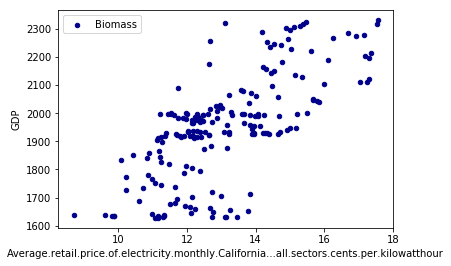

In [21]:
#This section illustrates different graphs for the x and y correlation.
plt.figure(figsize = (20,20))
data.plot(kind='scatter',x='Average.retail.price.of.electricity.monthly.California...all.sectors.cents.per.kilowatthour',y='GDP' ,color = 'DarkBlue', label='Biomass')